In [2]:
import healpy as hp
import numpy as np
import matplotlib.pyplot as plt
import sys
import os
sys.path.append(os.path.abspath("../"))

from sky import *

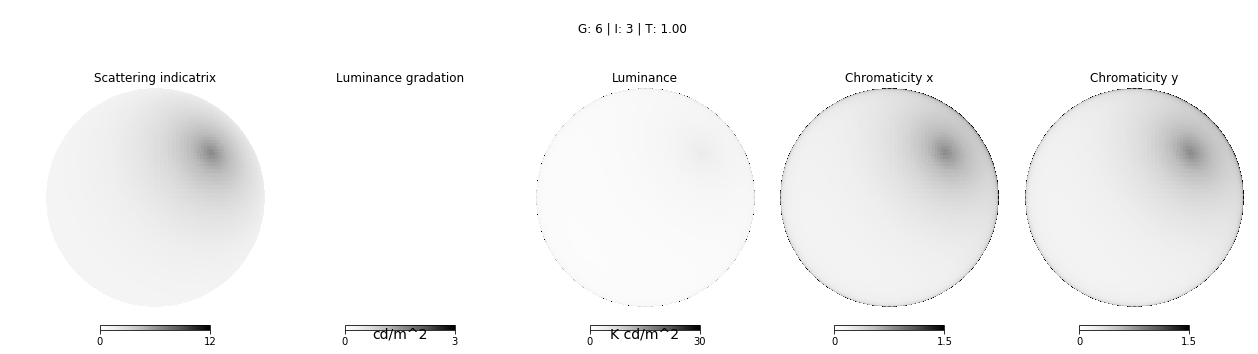

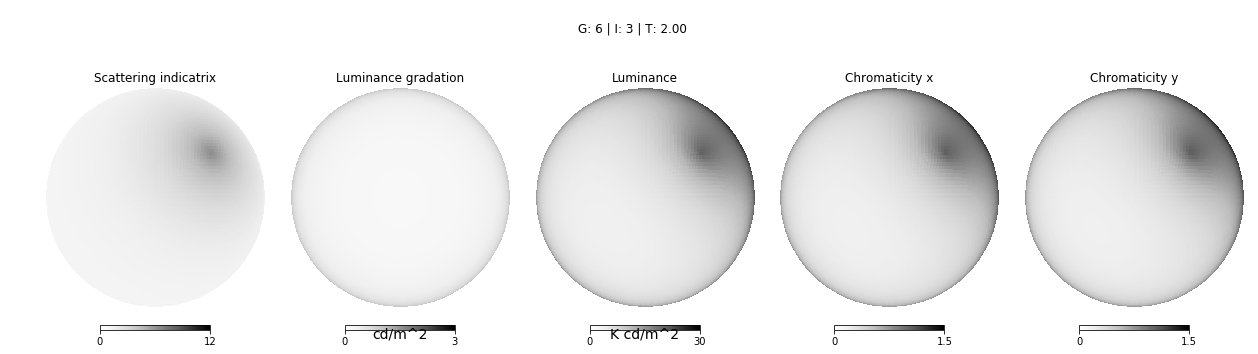

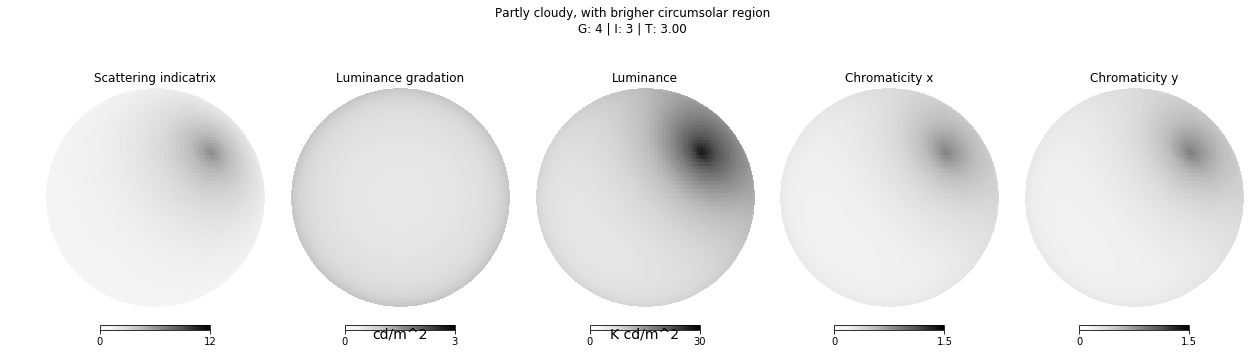

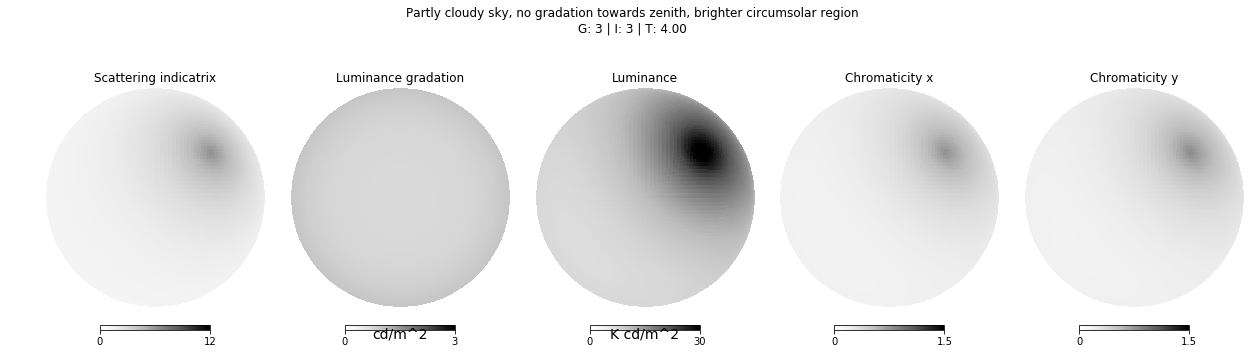

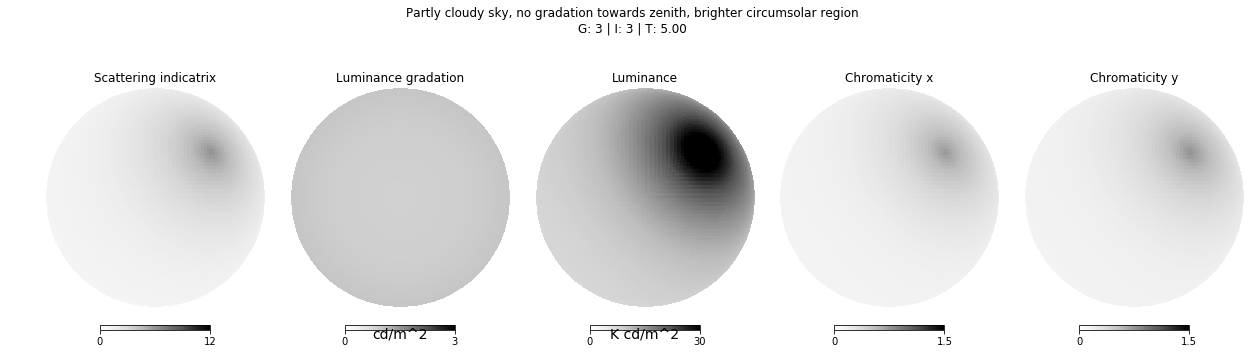

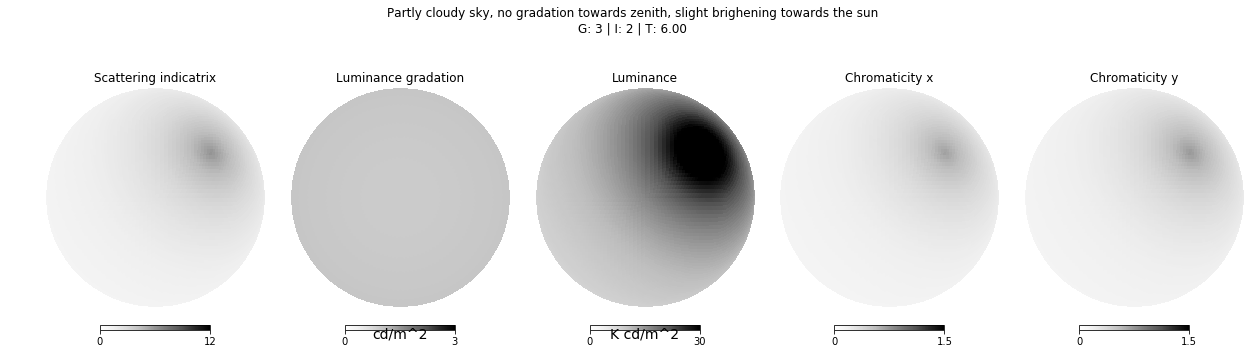

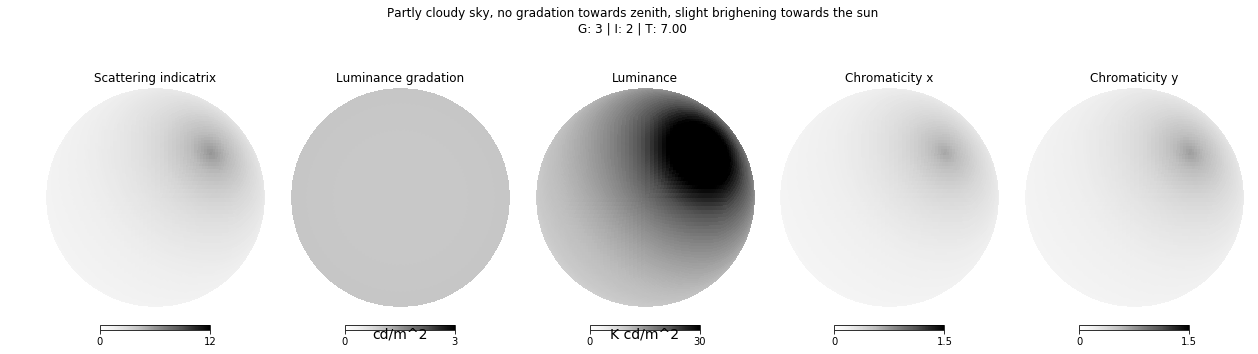

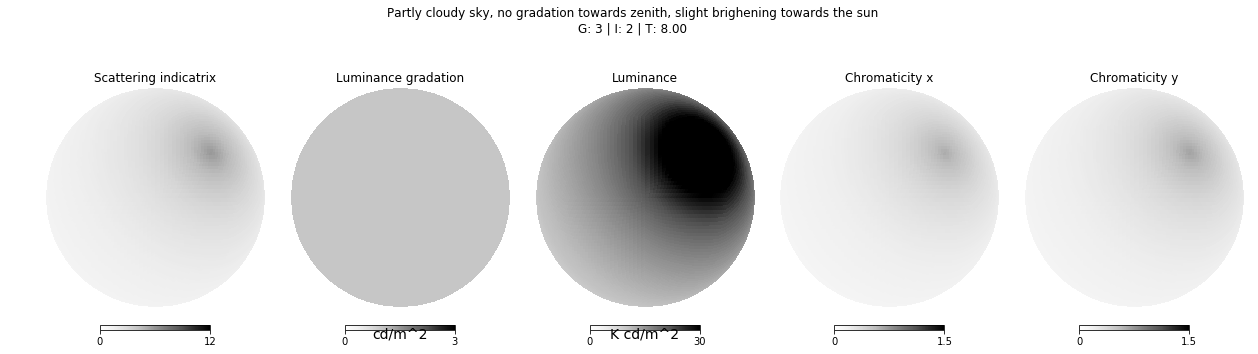

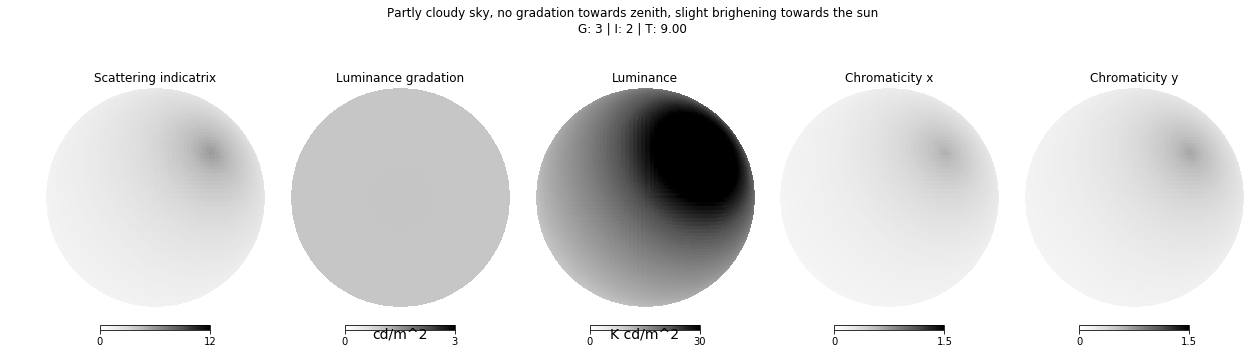

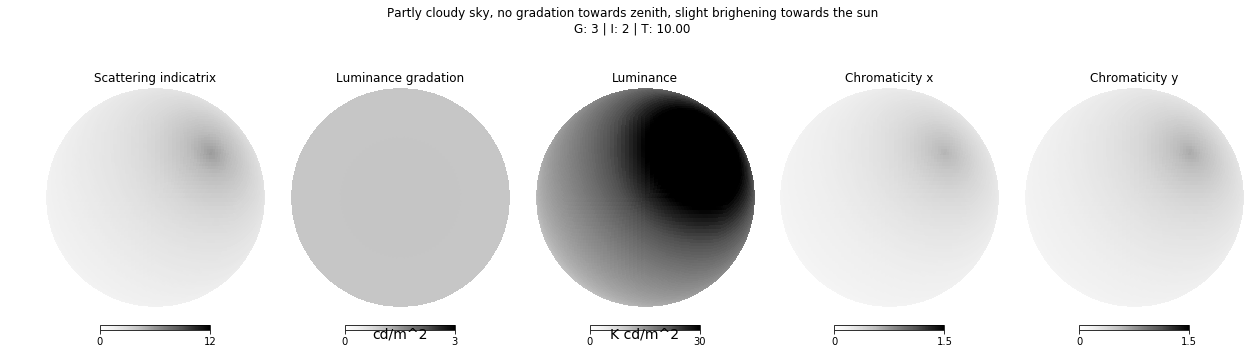

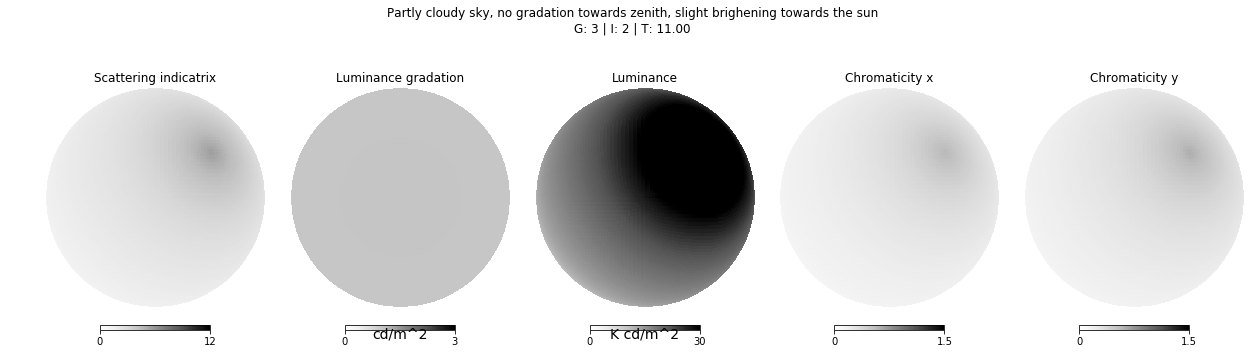

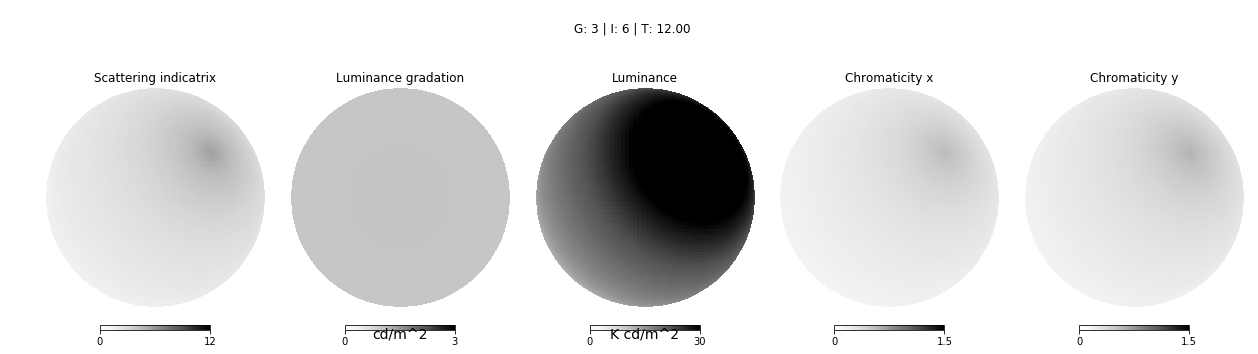

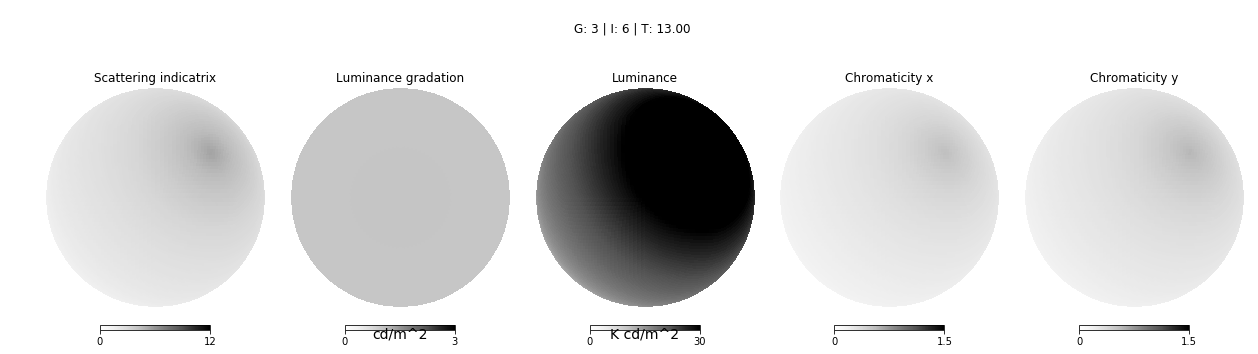

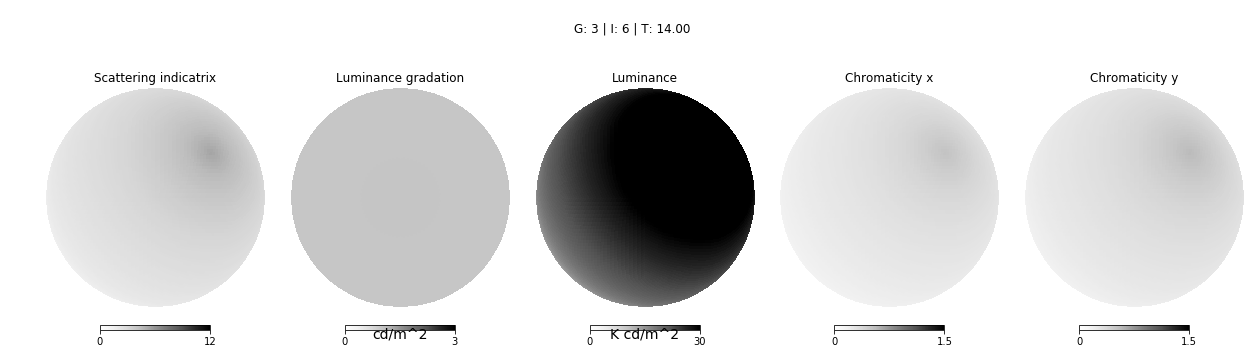

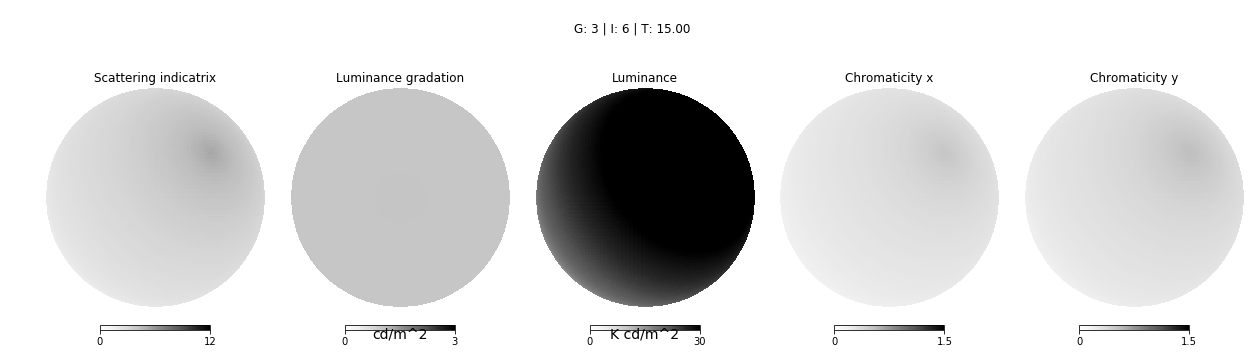

In [4]:
%matplotlib inline

for tau in xrange(1, 16):
    sky = ChromaticitySkyModel(turbidity=tau)
    sky.generate()
    t = "%s\nG: %d | I: %d | T: %0.2f" % (sky.description[-1], sky.gradation, sky.indicatrix, sky.turbidity)
    sky.plot_luminance(sky=sky, fig=tau, title=t)
plt.show()

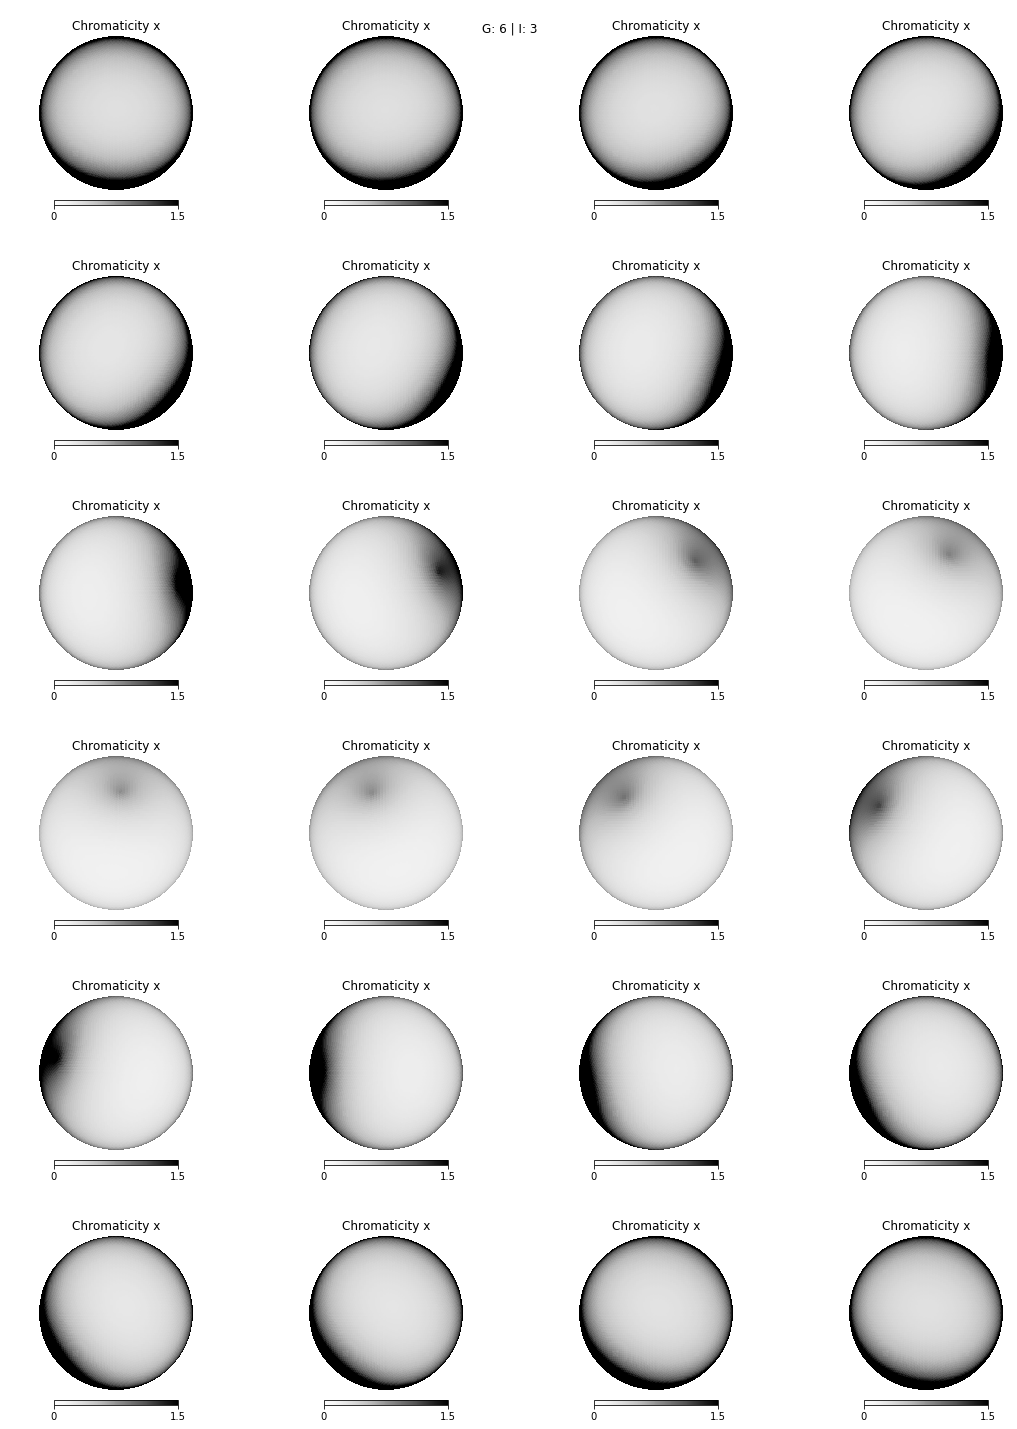

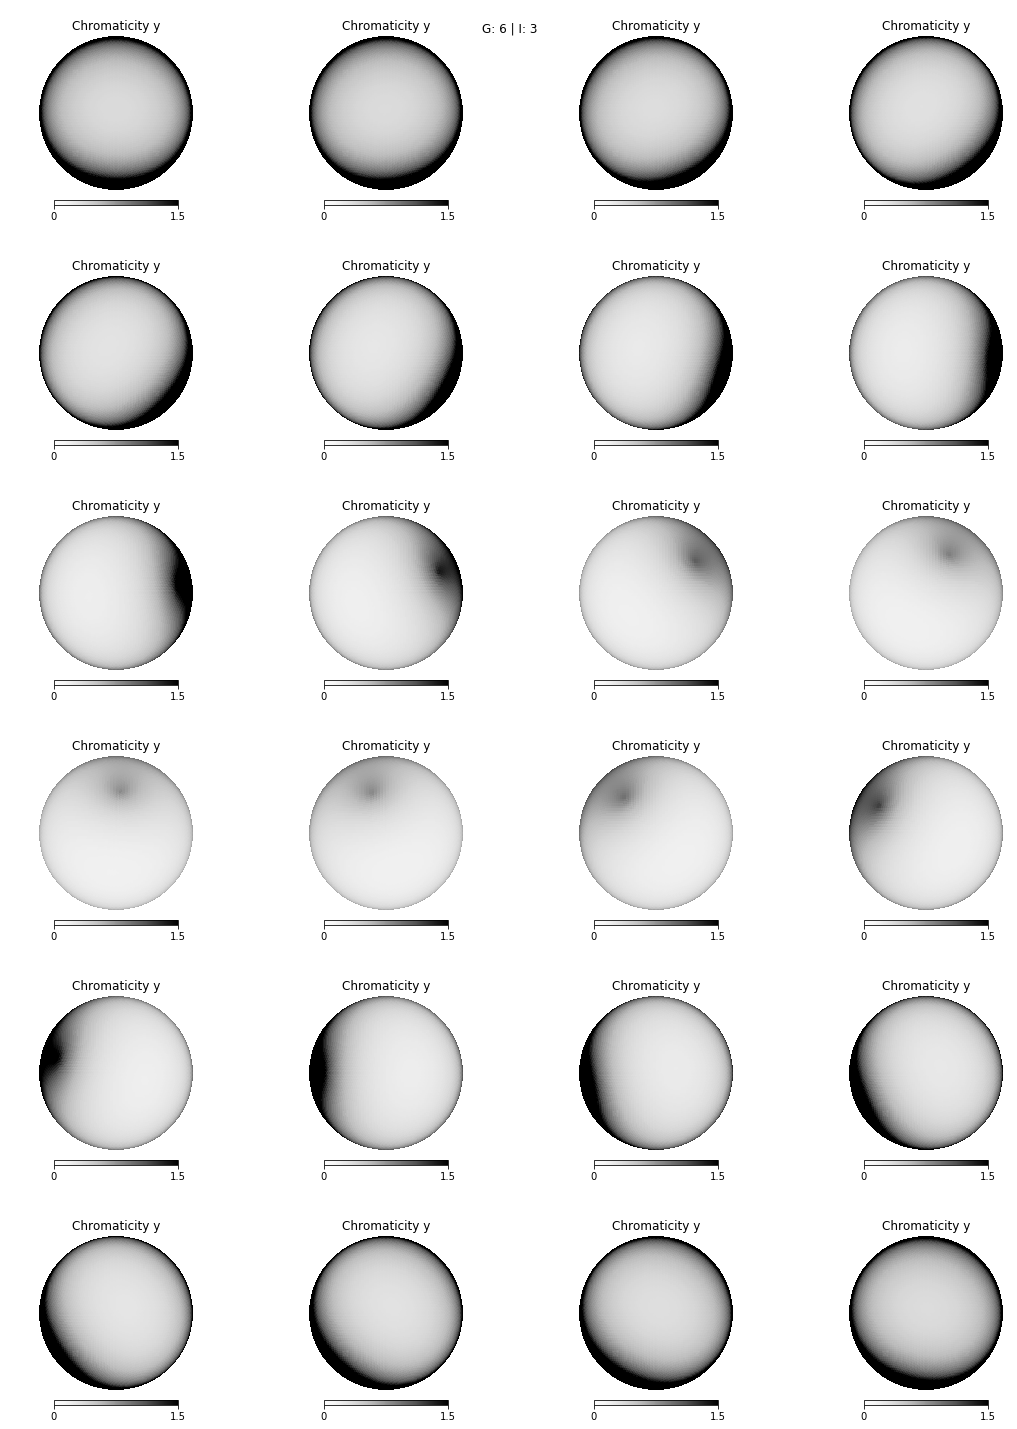

In [9]:
from datetime import datetime

sky = ChromaticitySkyModel(turbidity=2)

plt.figure(1, figsize=(15, 20))
plt.figure(2, figsize=(15, 20))
plt.figure(3, figsize=(15, 20))
for h in xrange(24):
    sky.obs.date =  datetime(2017, 6, 21, h, 0, 0)
    sky.generate()
    t = "%s\nG: %d | I: %d" % (sky.description[-1], sky.gradation, sky.indicatrix)
    ChromaticitySkyModel.plot_luminance(sky=sky, fig=1, sub=(6,4,h+1), mode="00100", title=t)
    ChromaticitySkyModel.plot_luminance(sky=sky, fig=2, sub=(6,4,h+1), mode="00010", title=t)
    ChromaticitySkyModel.plot_luminance(sky=sky, fig=3, sub=(6,4,h+1), mode="00001", title=t)
#     print "L:  ", sky.L.max()
#     print "C_x:", sky.C_x.max()
#     print "C_y:", sky.C_y.max()
plt.show()

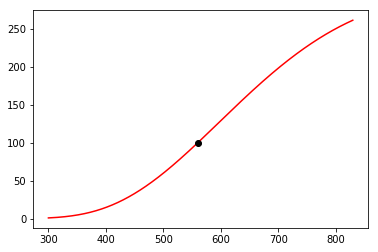

0.930482705616 261.602339766


In [4]:
def spectral_power(lam):
    a = 100. * np.power(560. / lam, 5)
    b = np.exp((1.435 * np.power(10, 7)) / (2848 * 560)) - 1
    c = np.exp((1.435 * np.power(10, 7)) / (2848 * lam)) - 1
    return a * b / c

x = np.linspace(300, 830, 1000, endpoint=True)
y = spectral_power(x)
plt.plot(x, y, 'r-')
plt.plot(560, spectral_power(560), 'ko')
plt.show()

print y.min(), y.max()

471 2
Saving plot spec.png


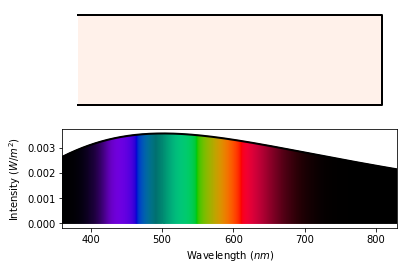

Saving plot ray.png


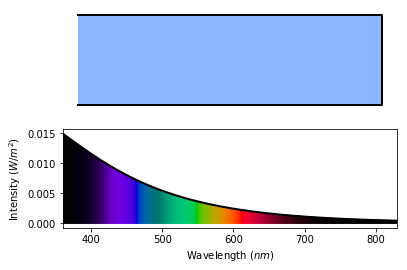

In [3]:
import colorpy as cp
import colorpy.illuminants
import colorpy.rayleigh

T_K = 5778    # sun illuminant
s = colorpy.illuminants.get_blackbody_illuminant(T_K)
r = colorpy.rayleigh.rayleigh_illuminated_spectrum(s)
print len(r), len(r[0])
cp.plots.spectrum_plot(s, filename="spec.png", title="")
plt.show()
cp.plots.spectrum_plot(r, filename="ray.png", title="")
plt.show()

In [11]:
sky = SkyModel()
sky.generate()
T = np.unique(sky.T[sky.T > 0].astype(int))
print T.shape

count = 0
for temp in T:
    if count % 500 == 0:
        s = colorpy.illuminants.get_blackbody_illuminant(temp)
        r = colorpy.rayleigh.rayleigh_illuminated_spectrum(s)
        c = (np.array(s) + np.array(r)) / 2
        cp.plots.spectrum_plot(s, filename="plots/%d-spec.png" % temp, title="T = %d" % temp)
        cp.plots.spectrum_plot(r, filename="plots/%d-ray.png" % temp, title="T = %d" % temp)
        cp.plots.spectrum_plot(c, filename="plots/%d-comb.png" % temp, title="T = %d" % temp)
    count += 1

(4262,)
Saving plot plots/4724-spec.png
Saving plot plots/4724-ray.png
Saving plot plots/4724-comb.png
Saving plot plots/6038-spec.png
Saving plot plots/6038-ray.png
Saving plot plots/6038-comb.png
Saving plot plots/6909-spec.png
Saving plot plots/6909-ray.png
Saving plot plots/6909-comb.png
Saving plot plots/7667-spec.png
Saving plot plots/7667-ray.png
Saving plot plots/7667-comb.png
Saving plot plots/8485-spec.png
Saving plot plots/8485-ray.png
Saving plot plots/8485-comb.png
Saving plot plots/9430-spec.png
Saving plot plots/9430-ray.png
Saving plot plots/9430-comb.png
Saving plot plots/10471-spec.png
Saving plot plots/10471-ray.png
Saving plot plots/10471-comb.png
Saving plot plots/11780-spec.png
Saving plot plots/11780-ray.png
Saving plot plots/11780-comb.png
Saving plot plots/13175-spec.png
Saving plot plots/13175-ray.png
Saving plot plots/13175-comb.png


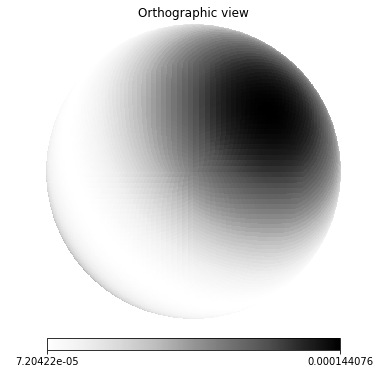

In [2]:
sky = SkyModel()
sky.generate()

def rayleigh(I_0, N, R, alpha, theta, lamda):
    """
    :param I_0:   intensity
    :param N:     number of scatterers
    :param R:     distance from scatterers
    :param alpha: polarisability
    :param theta: angle of scattering
    :parma lamda: wavelength
    """
    return I_0 * 8. * np.power(np.pi, 4) * N * np.square(alpha) * (1. + np.square(np.cos(theta))) / (np.power(lamda, 4) * np.square(R))

r = rayleigh(5778, 1., 1., 1., sky.theta_s, 500.)
hp.orthview(r, rot=sky.VIEW_ROT, flip="geo", cmap="Greys", half_sky=True)
plt.show()